# COURSE: A deep understanding of deep learning
## SECTION: Overfitting, cross-validation, regularization
### LECTURE: Cross-validation -- DataLoader
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [2]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from rich import print

# new!
from torch.utils.data import DataLoader, TensorDataset

In [3]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')


# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)

# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2



# A brief aside on using DataLoader

In [4]:
# create our fake dataset

fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10) > 4
print(fakedata)
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]

[False False False False False  True  True  True  True  True]

In [5]:
# dataloader object with all data
fakedataLdr = DataLoader(fakedata, shuffle=True)
print( f'fakedataLdr:           \t{fakedataLdr}' )
print( f'\nBatch Size (default):\t{fakedataLdr.batch_size}' )

fakedataLdr:            <torch.utils.data.dataloader.DataLoader object at 0x000001E0A2F37490>

Batch Size (default):   1

In [6]:
# Show the shape of a fakedataLdr element
print( f'\nShape of one element:\t{fakedataLdr.dataset[0].shape}\n' )

# iterate through the data  (oneSample = one batch dataset)
for i,oneSample in enumerate(fakedataLdr):
  print(i,oneSample)

# but where are the labels??

Shape of one element:   (4,)

0 tensor([[51, 52, 53, 54]], dtype=torch.int32)

1 tensor([[81, 82, 83, 84]], dtype=torch.int32)

2 tensor([[11, 12, 13, 14]], dtype=torch.int32)

3 tensor([[41, 42, 43, 44]], dtype=torch.int32)

4 tensor([[61, 62, 63, 64]], dtype=torch.int32)

5 tensor([[91, 92, 93, 94]], dtype=torch.int32)

6 tensor([[71, 72, 73, 74]], dtype=torch.int32)

7 tensor([[21, 22, 23, 24]], dtype=torch.int32)

8 tensor([[31, 32, 33, 34]], dtype=torch.int32)

9 tensor([[101, 102, 103, 104]], dtype=torch.int32)

In [7]:
# we need to create a Dataset that contains the data and labels
fakedata_t = torch.Tensor(fakedata)
fakelabels_t = torch.Tensor(fakelabels)

fakeDataset = TensorDataset(fakedata_t, fakelabels_t)
print(f'fakeDataset.tensors:\n{fakeDataset.tensors}\n')

# then create another DataLoader
fakedataLdr = DataLoader(fakeDataset, shuffle=True)

# iterate through the data
for dat,lab in fakedataLdr:
  print(dat,lab)

fakeDataset.tensors:
(tensor([[ 11.,  12.,  13.,  14.],
        [ 21.,  22.,  23.,  24.],
        [ 31.,  32.,  33.,  34.],
        [ 41.,  42.,  43.,  44.],
        [ 51.,  52.,  53.,  54.],
        [ 61.,  62.,  63.,  64.],
        [ 71.,  72.,  73.,  74.],
        [ 81.,  82.,  83.,  84.],
        [ 91.,  92.,  93.,  94.],
        [101., 102., 103., 104.]]), tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))

tensor([[61., 62., 63., 64.]]) tensor([1.])

tensor([[41., 42., 43., 44.]]) tensor([0.])

tensor([[91., 92., 93., 94.]]) tensor([1.])

tensor([[51., 52., 53., 54.]]) tensor([0.])

tensor([[11., 12., 13., 14.]]) tensor([0.])

tensor([[21., 22., 23., 24.]]) tensor([0.])

tensor([[81., 82., 83., 84.]]) tensor([1.])

tensor([[31., 32., 33., 34.]]) tensor([0.])

tensor([[71., 72., 73., 74.]]) tensor([1.])

tensor([[101., 102., 103., 104.]]) tensor([1.])

In [8]:
# use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(
    fakedata, fakelabels, test_size=0.2
)

# then convert them into PyTorch Datasets
train_data = TensorDataset(torch.Tensor(train_data), torch.Tensor(train_labels))
test_data = TensorDataset(torch.Tensor(test_data), torch.Tensor(test_labels))

# finally, translate into dataloader objects
# notice the batches (see next cell)!
train_loader = DataLoader(train_data, batch_size=4)
test_loader = DataLoader(test_data)

In [9]:
# examine the contents of the dataloader (batching is an advantage of dataloader!)
print("TRAINING DATA")
for batch, label in train_loader:  # iterable
    print(batch, label)

print("\nTESTING DATA")
for batch, label in test_loader:  # iterable
    print(batch, label)


TRAINING DATA

tensor([[11., 12., 13., 14.],
        [31., 32., 33., 34.],
        [91., 92., 93., 94.],
        [21., 22., 23., 24.]]) tensor([0., 0., 1., 0.])

tensor([[61., 62., 63., 64.],
        [81., 82., 83., 84.],
        [51., 52., 53., 54.],
        [41., 42., 43., 44.]]) tensor([1., 1., 0., 0.])

TESTING DATA

tensor([[101., 102., 103., 104.]]) tensor([1.])

tensor([[71., 72., 73., 74.]]) tensor([1.])

# Now back to the real data!

In [10]:
# use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, train_size=0.8
)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)


# finally, translate into dataloader objects
train_loader = DataLoader(train_data, shuffle=True, batch_size=12)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [11]:
# check sizes of data batches
for b, (X, y) in enumerate(train_loader):
    print(f'Batch #{b}:  X:{X.shape} y:{y.shape}')

print(f'\nLast Batch #{b}:\nX:{X}\ny:{y}')

Batch #0:  X:torch.Size([12, 4]) y:torch.Size([12])

Batch #1:  X:torch.Size([12, 4]) y:torch.Size([12])

Batch #2:  X:torch.Size([12, 4]) y:torch.Size([12])

Batch #3:  X:torch.Size([12, 4]) y:torch.Size([12])

Batch #4:  X:torch.Size([12, 4]) y:torch.Size([12])

Batch #5:  X:torch.Size([12, 4]) y:torch.Size([12])

Batch #6:  X:torch.Size([12, 4]) y:torch.Size([12])

Batch #7:  X:torch.Size([12, 4]) y:torch.Size([12])

Batch #8:  X:torch.Size([12, 4]) y:torch.Size([12])

Batch #9:  X:torch.Size([12, 4]) y:torch.Size([12])

Last Batch #9:
X:tensor([[6.9000, 3.1000, 5.1000, 2.3000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.0000, 3.0000, 1.6000, 0.2000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [5.0000, 3.3000, 1.4000, 0.2000]])
y:tensor([2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0])

In [12]:
# a function that creates the ANN model

def createANewModel():
    # model architecture
    ANNiris = nn.Sequential(
        nn.Linear(4, 64),  # input layer
        nn.ReLU(),  # activation unit
        nn.Linear(64, 64),  # hidden layer
        nn.ReLU(),  # activation unit
        nn.Linear(64, 3),  # output units
    )

    # loss function
    lossfun = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

    return ANNiris, lossfun, optimizer

In [15]:
# train the model

# global parameter
numepochs = 500


def trainTheModel(model, lossfun, optimizer, train_loader):
    # initialize accuracies as empties (not storing losses here)
    trainAcc = []
    testAcc = []
    losses = []

    # loop over epochs
    for epochi in range(numepochs):
        # loop over training data batches
        batchAcc = []
        for X, y in train_loader:
            # forward pass and loss
            yHat = model(X)
            loss = lossfun(yHat, y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # compute training accuracy just for this batch
            batchAcc.append(
                100 * torch.mean((torch.argmax(yHat, axis=1) == y).float()).item()
            )
        # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append(np.mean(batchAcc))

        # test accuracy
        X, y = next(iter(test_loader))  # extract X,y from test dataloader
        predlabels = torch.argmax(model(X), axis=1)
        testAcc.append(100 * torch.mean((predlabels == y).float()).item())

        # store the loss
        losses.append(loss.item())

    # function output
    return trainAcc, testAcc, losses

# Modeling

In [17]:
# create a model
ANNiris,lossfun,optimizer = createANewModel()

# train the model
trainAcc,testAcc, losses = trainTheModel(ANNiris,lossfun,optimizer,train_loader)


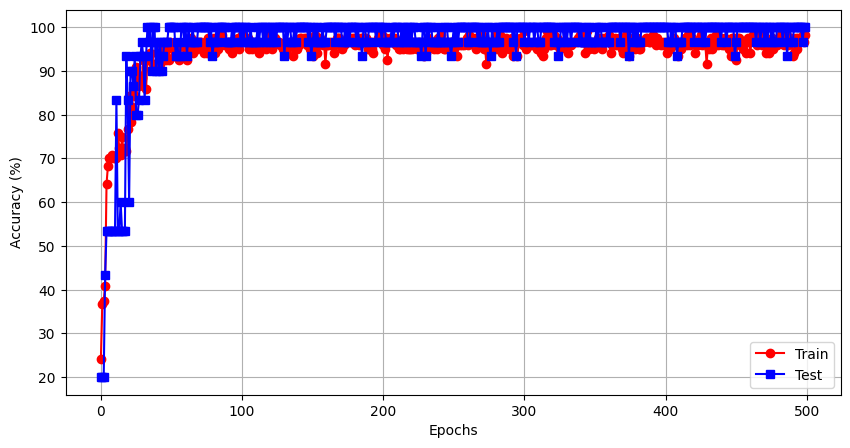

In [18]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])

plt.grid()

# optional zoom-in to final epochs
# plt.xlim([300,500])
# plt.ylim([90,100.5])

plt.show()

# Additional explorations

In [19]:
# 1) Read the help doc for the train_test_split() function, in particular to understand what the 'shuffle' option does.
#    What is the default value? Run the code again, switching the shuffling off. How does that affect model performance? Why?
# 
# 2) The model training loop does not keep track of the losses. Modify the code to store the loss value on each epoch, include
#    it as an output of the training function, and then make a plot of the training losses. Try to do it without looking
#    at other code files!
# 

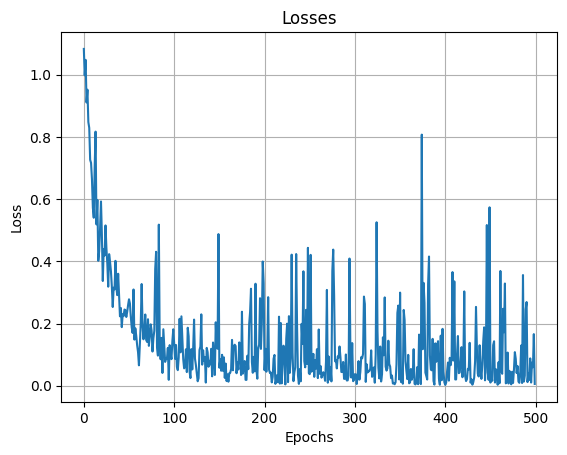

In [21]:
# Plot the losses 
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses')
plt.grid()
plt.show()
